In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\patri\Anaconda3\envs\mcts\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel("irt_frame_ge2.xlsx")

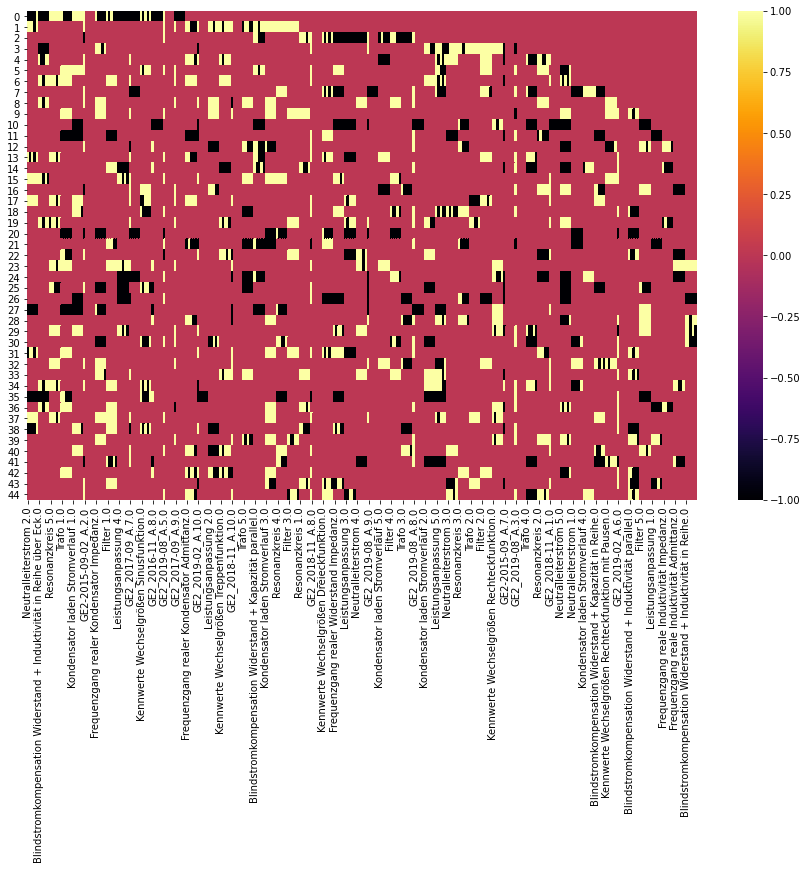

In [3]:
plt.figure(figsize=(15,9))
sns.heatmap(df, cmap="inferno")

<BarContainer object of 295 artists>

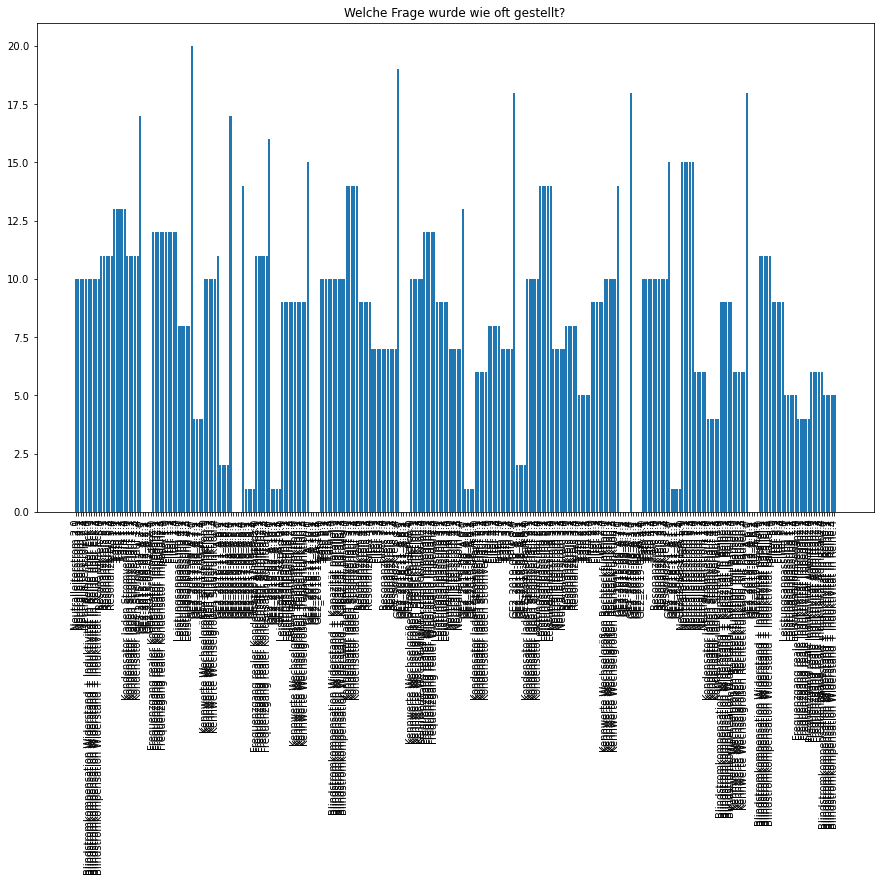

In [4]:
# Welche Frage wurde wie oft gestellt?
correct_answers = df[df==1].count()
wrong_answers = df[df==-1].count()
not_asked = df[df==0].count()
times_asked = correct_answers + wrong_answers
names = list(times_asked.index)
values = list(times_asked)
plt.figure(figsize=(15, 9))
plt.title("Welche Frage wurde wie oft gestellt?")
plt.xticks(rotation=90)
plt.bar(names, values)


<BarContainer object of 295 artists>

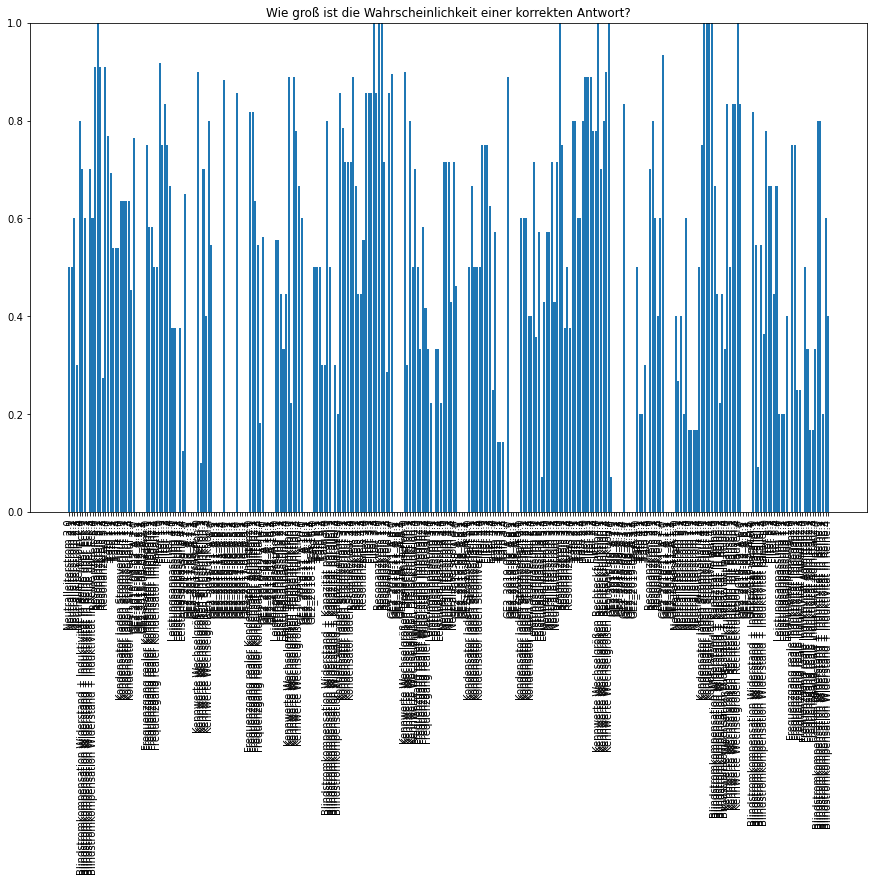

In [5]:

correct_answer_percent = correct_answers / (correct_answers + wrong_answers)
names = list(correct_answer_percent.index)
values = list(correct_answer_percent)
plt.figure(figsize=(15, 9))
plt.title("Wie groß ist die Wahrscheinlichkeit einer korrekten Antwort?")
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.bar(names, values)


50


<BarContainer object of 45 artists>

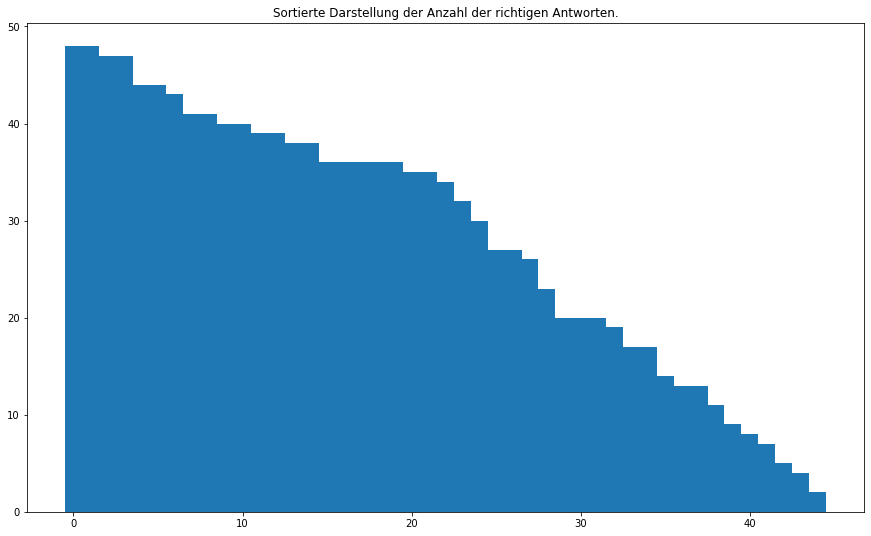

In [6]:
correct_answers_student = df[df==1].count(axis=1)
wrong_answers_student = df[df==-1].count(axis=1)
worked_questions = correct_answers_student + wrong_answers_student
correct_answer_percent_student = correct_answers_student / (correct_answers_student + wrong_answers_student)
print(min(worked_questions)) # Überprüfung ob wirklich allen Studenten sämtliche Fragen zugeordnet worden sind
sorted_df = correct_answers_student.sort_values(ascending=False)
names = list(sorted_df.index)
names = range(len(names))
values = list(sorted_df)
plt.figure(figsize=(15, 9))
plt.title("Sortierte Darstellung der Anzahl der richtigen Antworten.")
plt.bar(names, values, width=1)

(array([ 3.,  3.,  4.,  5.,  2.,  3.,  3., 11.,  7.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

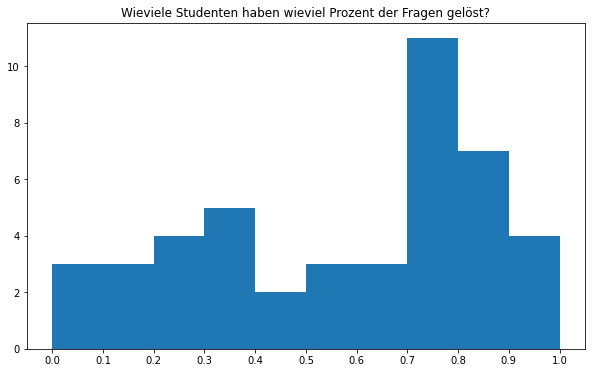

In [7]:
bins = [x/10 for x in range(11)]
plt.figure(figsize=(10, 6))
plt.title("Wieviele Studenten haben wieviel Prozent der Fragen gelöst?")
plt.xticks(bins)
plt.hist(correct_answer_percent_student, bins=bins)

In [8]:
print("Fragen die eine Antwortrate von weniger 20% haben:")
print(correct_answer_percent[correct_answer_percent < 0.2])

Fragen die eine Antwortrate von weniger 20% haben:
Blindstromkompensation Widerstand + Induktivität in Reihe über Eck.2    0.000000
Leistungsanpassung 4.2                                                  0.000000
Leistungsanpassung 4.4                                                  0.125000
GE2_2017-09_A.7.1                                                       0.000000
GE2_2017-09_A.7.2                                                       0.000000
GE2_2017-09_A.7.3                                                       0.000000
GE2_2017-09_A.7.4                                                       0.000000
Kennwerte Wechselgrößen Sinusfunktion.1                                 0.100000
GE2_2016-11_A.8.1                                                       0.000000
GE2_2016-11_A.8.2                                                       0.000000
GE2_2016-11_A.8.3                                                       0.000000
GE2_2016-11_A.8.4                                         

In [9]:
print("Fragen die eine Antwortrate von höher 80% haben:")
print(correct_answer_percent[correct_answer_percent > 0.8])

Fragen die eine Antwortrate von höher 80% haben:
Resonanzkreis 5.0                                              0.909091
Resonanzkreis 5.1                                              1.000000
Resonanzkreis 5.2                                              0.909091
Resonanzkreis 5.4                                              0.909091
Filter 1.0                                                     0.916667
Filter 1.2                                                     0.833333
Kennwerte Wechselgrößen Sinusfunktion.0                        0.900000
GE2_2019-08_A.5.0                                              0.882353
GE2_2017-09_A.9.0                                              0.857143
Frequenzgang realer Kondensator Admittanz.0                    0.818182
Frequenzgang realer Kondensator Admittanz.1                    0.818182
Kennwerte Wechselgrößen Treppenfunktion.0                      0.888889
Kennwerte Wechselgrößen Treppenfunktion.2                      0.888889
Kondensator lad

In [10]:
# Vergleich mit IRT
thetas = np.load("thetas_Klausur_2020.npy")
abcd = pd.read_csv("abcd_Klausur_2020.csv", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'thetas_Klausur_2020.npy'

In [ ]:
fig, axs = plt.subplots(2, figsize=(10,9))
fig.suptitle('Vergleich der sortierten IRT-Thetas mit Wahrscheinlichkeiten der richtigen Antwort. (IRT oben)')
axs[0].plot(np.sort(np.squeeze(thetas)))
axs[1].plot(np.sort(correct_answers_student.values))


In [ ]:
c = pd.DataFrame([abcd["b"], correct_answer_percent])

In [ ]:
fig, axs = plt.subplots(2, figsize=(10,9))
fig.suptitle('Vergleich der sortierten IRT-Thetas mit Wahrscheinlichkeiten der richtigen Antwort. (IRT oben)')
axs[0].plot(abcd["b"])
axs[1].plot(correct_answer_percent)


In [ ]:
swa = sum(wrong_answers)
sca = sum(correct_answers)
plt.figure(figsize=(10, 6))
plt.title("Wie ist das Verhältnis der richtigen zu falschen Antworten?")
plt.pie([sca, swa], labels=(["Richtige Antworten", "Falsche Antworten"]))